In [ ]:
# https://github.com/Element84/geo-notebooks/blob/main/notebooks/odc-landsat.ipynb

In [ ]:
# pip install jupyter_bokeh
# pip install geogif

In [43]:
import os
import json
import yaml
import logging
import pystac
import hvplot.pandas
import pandas as pd
import geopandas as gpd
import holoviews as hv
import panel as pn
import hvplot.xarray
import dask.distributed

from dask.distributed import wait
from IPython.display import HTML
from copy import deepcopy
from odc.stac import stac_load
from pystac_client import Client
from shapely.geometry import shape
from pystac.extensions.projection import ProjectionExtension
from pyproj import CRS
from geogif import gif

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
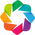

In [16]:
hv.extension('bokeh')
os.environ['AWS_REQUEST_PAYER'] = 'requester'
pd.set_option("display.max_colwidth", 150)
pd.reset_option("display.max_colwidth")

In [4]:
logging.basicConfig()
logger = logging.getLogger('pystac_client')
logger.setLevel(logging.INFO)

In [5]:
# create a function for later reuse
def plot_polygons(data, *args, **kwargs):
    return data.hvplot.paths(*args, geo=True, tiles='OSM', xaxis=None, yaxis=None,
                             frame_width=600, frame_height=600,
                             line_width=3, **kwargs)


# convert a list of STAC Items into a GeoDataFrame
def items_to_geodataframe(items):
    _items = []
    for i in items:
        _i = deepcopy(i)
        _i['geometry'] = shape(_i['geometry'])
        _items.append(_i)
    gdf = gpd.GeoDataFrame(pd.json_normalize(_items))
    for field in ['properties.datetime', 'properties.created', 'properties.updated']:
        if field in gdf:
            gdf[field] = pd.to_datetime(gdf[field])
    gdf.set_index('properties.datetime', inplace=True)
    return gdf

### Search for data

In [9]:
URL = 'https://landsatlook.usgs.gov/stac-server'
cat = Client.open(URL)
print(cat)

<Client id=stac-server>


In [11]:
collections = [(c.id, c.title) for c in cat.get_collections()]

df = pd.DataFrame(collections, columns=['id', 'title'])
df

,id,title
0,landsat-c2l2-sr,Landsat Collection 2 Level-2 UTM Surface Reflectance (SR) Product
1,landsat-c2l2-st,Landsat Collection 2 Level-2 UTM Surface Temperature (ST) Product
2,landsat-c2ard-st,Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Surface Temperature (ST) Product
3,landsat-c2l2alb-bt,Landsat Collection 2 Level-2 Albers Top of Atmosphere Brightness Temperature (BT) Product
4,landsat-c2l3-fsca,Landsat Collection 2 Level-3 Fractional Snow Covered Area (fSCA) Product
5,landsat-c2ard-bt,Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Top of Atmosphere Brightness Temperature (BT) Product
6,landsat-c2l1,Landsat Collection 2 Level-1 Product
7,landsat-c2l3-ba,Landsat Collection 2 Level-3 Burned Area (BA) Product
8,landsat-c2l2alb-st,Landsat Collection 2 Level-2 Albers Surface Temperature (ST) Product
9,landsat-c2ard-sr,Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Surface Reflectance (SR) Product


In [12]:
collection_id = 'landsat-c2l2-sr'

collection = cat.get_collection(collection_id)
pd.DataFrame.from_dict(collection.to_dict()['item_assets'], orient='index')

""


In [15]:
aoi = gpd.read_file('aois/bear-fire.geojson')
geom = json.loads(aoi['geometry'].to_json())['features'][0]['geometry']

# limit sets the # of items per page so we can see multiple pages getting fetched
search = cat.search(
    collections = [collection_id],
    intersects = aoi['geometry'][0],
    datetime = "2021-01-01/2021-03-31",
    query = ["eo:cloud_cover<10"],
    limit = 100
)

print(f"{search.matched()} items found")

12 items found


### Use GeoPandas to view footprints

In [17]:
# Get all items as a dictionary
items_dict = search.get_all_items_as_dict()['features']

# update URLs to use s3
for item in items_dict:
    for a in item['assets']:
        if 'alternate' in item['assets'][a] and 's3' in item['assets'][a]['alternate']:
            item['assets'][a]['href'] = item['assets'][a]['alternate']['s3']['href']
        item['assets'][a]['href'] = item['assets'][a]['href'].replace('usgs-landsat-ard', 'usgs-landsat')

# Create GeoDataFrame from Items
items_gdf = items_to_geodataframe(items_dict)

print(f"{len(items_dict)} items found")

/home/apolo/anaconda3/envs/geospatial/lib/python3.11/site-packages/pystac_client/item_search.py:911: FutureWarning: get_all_items_as_dict() is deprecated, use item_collection_as_dict() instead.
  warnings.warn(


12 items found


In [18]:
items_gdf.head()

,type,stac_version,stac_extensions,id,description,bbox,geometry,links,collection,properties.eo:cloud_cover,...,assets.qa_aerosol.title,assets.qa_aerosol.description,assets.qa_aerosol.type,assets.qa_aerosol.roles,assets.qa_aerosol.classification:bitfields,assets.qa_aerosol.href,assets.qa_aerosol.alternate.s3.storage:platform,assets.qa_aerosol.alternate.s3.storage:requester_pays,assets.qa_aerosol.alternate.s3.href,assets.qa_aerosol.file:checksum
properties.datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-29 17:57:33.490812+00:00,Feature,1.0.0,[https://landsat.usgs.gov/stac/landsat-extensi...,LE07_L2SP_044033_20210329_20210424_02_T1_SR,Landsat Collection 2 Level-2 Surface Reflectan...,"[-123.16933673230103, 37.967586391961895, -120...","POLYGON ((-122.70691 39.88451, -123.16934 38.2...","[{'rel': 'self', 'href': 'https://landsatlook....",landsat-c2l2-sr,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29 17:57:09.605839+00:00,Feature,1.0.0,[https://landsat.usgs.gov/stac/landsat-extensi...,LE07_L2SP_044032_20210329_20210424_02_T1_SR,Landsat Collection 2 Level-2 Surface Reflectan...,"[-122.75804115912865, 39.39105935971196, -119....","POLYGON ((-122.2827 41.31316, -122.75804 39.71...","[{'rel': 'self', 'href': 'https://landsatlook....",landsat-c2l2-sr,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-21 18:45:29.657317+00:00,Feature,1.0.0,[https://landsat.usgs.gov/stac/landsat-extensi...,LC08_L2SP_044033_20210321_20210401_02_T1_SR,Landsat Collection 2 Level-2 Surface Reflectan...,"[-122.97931801175768, 37.8434183490747, -120.3...","POLYGON ((-122.47622 39.9537, -122.97932 38.23...","[{'rel': 'self', 'href': 'https://landsatlook....",landsat-c2l2-sr,0.66,...,Aerosol Quality Analysis Band,Collection 2 Level-2 Aerosol Quality Analysis ...,image/vnd.stac.geotiff; cloud-optimized=true,"[metadata, data-mask, water-mask]","[{'name': 'fill', 'description': 'Correspondin...",s3://usgs-landsat/collection02/level-2/standar...,AWS,True,s3://usgs-landsat/collection02/level-2/standar...,1340d1678ad3ea575a9553e46d67d3fe658e9c11dc7b85...
2021-03-21 18:45:05.774750+00:00,Feature,1.0.0,[https://landsat.usgs.gov/stac/landsat-extensi...,LC08_L2SP_044032_20210321_20210401_02_T1_SR,Landsat Collection 2 Level-2 Surface Reflectan...,"[-122.5616372989691, 39.27085334584511, -119.8...","POLYGON ((-122.04154 41.38275, -122.56164 39.6...","[{'rel': 'self', 'href': 'https://landsatlook....",landsat-c2l2-sr,0.58,...,Aerosol Quality Analysis Band,Collection 2 Level-2 Aerosol Quality Analysis ...,image/vnd.stac.geotiff; cloud-optimized=true,"[metadata, data-mask, water-mask]","[{'name': 'fill', 'description': 'Correspondin...",s3://usgs-landsat/collection02/level-2/standar...,AWS,True,s3://usgs-landsat/collection02/level-2/standar...,134019fa06b8391d6d805bdf0c1bc353394b2ba1534401...
2021-03-13 17:58:50.920048+00:00,Feature,1.0.0,[https://landsat.usgs.gov/stac/landsat-extensi...,LE07_L2SP_044033_20210313_20210410_02_T1_SR,Landsat Collection 2 Level-2 Surface Reflectan...,"[-123.17378821742815, 37.964431499436735, -120...","POLYGON ((-122.71114 39.88128, -123.17379 38.2...","[{'rel': 'self', 'href': 'https://landsatlook....",landsat-c2l2-sr,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
plot_polygons(aoi) * items_gdf.hvplot.paths(geo=True)

:Overlay
   .WMTS.I  :WMTS   [Longitude,Latitude]
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]

### OpenDataCube

In [20]:
cfg = """---
landat-c2l2-sr:
  measurements:
    '*':
      dtype: uint16
      nodata: 0
      unit: 'm'
"""
cfg = yaml.load(cfg, Loader=yaml.CSafeLoader)

In [21]:
# Create PySTAC ItemCollection
item_collection = pystac.ItemCollection(items_dict)

In [22]:
dc = stac_load(
	item_collection,
    bands=['red', 'blue', 'green', 'nir08'],
    chunks={"x": 2048, "y": 2048},
    groupby='solar_day',
    stac_cfg=cfg,
    geopolygon=geom,
)

In [23]:
dc

<xarray.Dataset> Size: 13MB
Dimensions:      (y: 339, x: 403, time: 6)
Coordinates:
  * y            (y) float64 3kB 4.395e+06 4.395e+06 ... 4.385e+06 4.385e+06
  * x            (x) float64 3kB 6.331e+05 6.331e+05 ... 6.451e+05 6.452e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 48B 2021-01-16T18:45:26.576045 ... 202...
Data variables:
    red          (time, y, x) float32 3MB dask.array<chunksize=(1, 339, 403), meta=np.ndarray>
    blue         (time, y, x) float32 3MB dask.array<chunksize=(1, 339, 403), meta=np.ndarray>
    green        (time, y, x) float32 3MB dask.array<chunksize=(1, 339, 403), meta=np.ndarray>
    nir08        (time, y, x) float32 3MB dask.array<chunksize=(1, 339, 403), meta=np.ndarray>

### Calculations

In [24]:
vis = dc.odc.to_rgba(vmin=1, vmax=20000, bands=['red', 'green', 'blue'])
vis

<xarray.DataArray 'ro_rgba-a79cde540ece854cb57f9d04a731d985-6645fe728e76c208ee73742b33f2beb0' (
                                                                                               time: 6,
                                                                                               y: 339,
                                                                                               x: 403,
                                                                                               band: 4)> Size: 3MB
dask.array<ro_rgba-a79cde540ece854cb57f9d04a731d985, shape=(6, 339, 403, 4), dtype=uint8, chunksize=(1, 339, 403, 4), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 3kB 4.395e+06 4.395e+06 ... 4.385e+06 4.385e+06
  * x            (x) float64 3kB 6.331e+05 6.331e+05 ... 6.451e+05 6.452e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 48B 2021-01-16T18:45:26.576045 ... 202...
  * band         (band) <U1 16B 'r' 'g' 'b' 'a'

In [ ]:
ndvi      = ((dc['nir08'] - dc['red']) / (dc['nir08'] + dc['red'])).clip(0, 1)
ndvi.name = 'ndvi'
ndvi

<xarray.DataArray 'ndvi' (time: 6, y: 339, x: 403)> Size: 3MB
dask.array<clip, shape=(6, 339, 403), dtype=float32, chunksize=(1, 339, 403), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 3kB 4.395e+06 4.395e+06 ... 4.385e+06 4.385e+06
  * x            (x) float64 3kB 6.331e+05 6.331e+05 ... 6.451e+05 6.452e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 48B 2021-01-16T18:45:26.576045 ... 202...

### Start Dask Client

In [ ]:
client = dask.distributed.Client()
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
/home/apolo/anaconda3/envs/geospatial/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43931 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39551
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:43931/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40963'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34443'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38103'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36389'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:40425 name: 1
IN

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:43931/status,
Dashboard: http://127.0.0.1:43931/status,Workers: 4
Total threads: 16,Total memory: 15.35 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39551,Workers: 4
Dashboard: http://127.0.0.1:43931/status,Total threads: 16
Started: Just now,Total memory: 15.35 GiB
Comm: tcp://127.0.0.1:43041,Total threads: 4
Dashboard: http://127.0.0.1:35503/status,Memory: 3.84 GiB
Nanny: tcp://127.0.0.1:40963,


INFO:distributed.scheduler:Remove client Client-5a1e8196-1f04-11f0-aeb6-b44506bff5f1
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:47498; closing.
INFO:distributed.scheduler:Remove client Client-5a1e8196-1f04-11f0-aeb6-b44506bff5f1
INFO:distributed.scheduler:Close client connection: Client-5a1e8196-1f04-11f0-aeb6-b44506bff5f1
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1745277173.1231813') (0, 1, 2, 3)
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:47476; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:47490; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:43041 name: 0 (stimulus_id='handle-worker-cleanup-1745277173.1280763')
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:40425 name: 1 (stimulus_id='handle-worker-cleanup-1745277173.1287863')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:47454; closing.
INFO:distributed.sch

### Compute

In [30]:
vis = client.persist(vis)
_ = wait(vis)

/home/apolo/anaconda3/envs/geospatial/lib/python3.11/site-packages/odc/geo/_rgba.py:55: RuntimeWarning: invalid value encountered in cast
  return x.astype("uint8")
/home/apolo/anaconda3/envs/geospatial/lib/python3.11/site-packages/odc/geo/_rgba.py:55: RuntimeWarning: invalid value encountered in cast
  return x.astype("uint8")


In [46]:
vis

<xarray.DataArray 'ro_rgba-a79cde540ece854cb57f9d04a731d985-6645fe728e76c208ee73742b33f2beb0' (
                                                                                               time: 6,
                                                                                               y: 339,
                                                                                               x: 403,
                                                                                               band: 4)> Size: 3MB
dask.array<ro_rgba-a79cde540ece854cb57f9d04a731d985, shape=(6, 339, 403, 4), dtype=uint8, chunksize=(1, 339, 403, 4), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 3kB 4.395e+06 4.395e+06 ... 4.385e+06 4.385e+06
  * x            (x) float64 3kB 6.331e+05 6.331e+05 ... 6.451e+05 6.452e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 48B 2021-01-16T18:45:26.576045 ... 202...
  * band         (band) <U1 16B 'r' 'g' 'b' 'a'

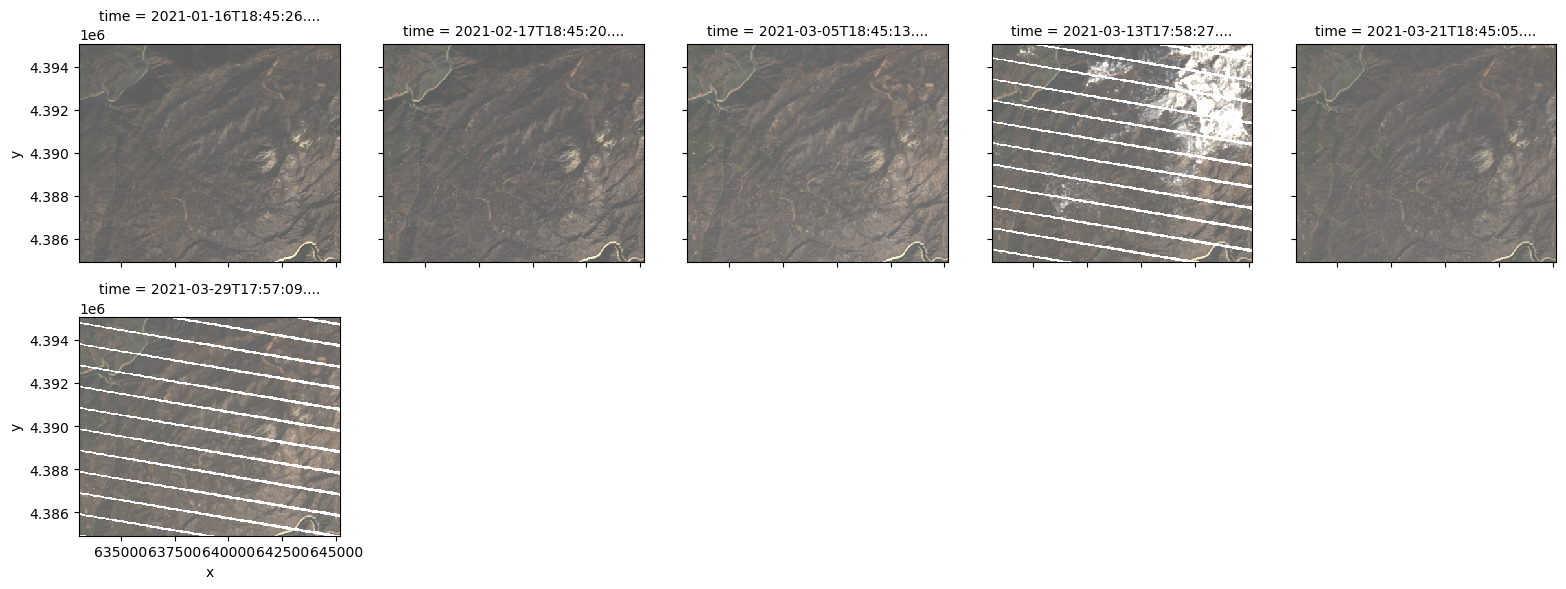

In [31]:
vis_ = vis.compute()
vis_.plot.imshow(col='time', rgb='band', col_wrap=5, robust=True)

In [32]:
vis_.spatial_ref.crs_wkt

'PROJCRS["WGS 84 / UTM zone 10N",BASEGEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],MEMBER["World Geodetic System 1984 (G2296)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4326]],CONVERSION["UTM zone 10N",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",-123,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9996,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False

In [39]:
hvplot_kwargs = dict(
	crs=32610,
	tiles='OSM', 
    frame_width=400,
	widgets={'time': pn.widgets.Select}
)

vis_.hvplot.rgb(x='x', y='y', bands='band', **hvplot_kwargs)

BokehModel(combine_events=True, render_bundle={'docs_json': {'a3404d64-01bf-46d5-8205-040b02074be3': {'version…

In [41]:
ndvi_ = ndvi.compute()
ndvi_.hvplot(x='x', y='y', **hvplot_kwargs)

BokehModel(combine_events=True, render_bundle={'docs_json': {'69adeb1b-aa3d-4d31-bbed-5b9b0f6a3c58': {'version…

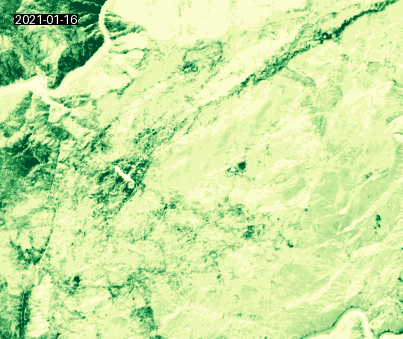

In [44]:
# ndvi_ = ndvi_c.transpose('time','x','y').compute()

gif(ndvi_, fps=1, cmap='YlGn')

In [45]:
ndvi_mean = ndvi.mean(dim=['x', 'y']).compute()
ndvi_mean.hvplot()

:Curve   [time]   (ndvi)

### Shutdown cluster

In [47]:
client.close()

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40963'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34443'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38103'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36389'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:34443' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:36389' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:40963' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:38103' closed.
